<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statsmodels

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/macrodata.csv',
                 index_col=0,
                 parse_dates=True
                 )

In [ ]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


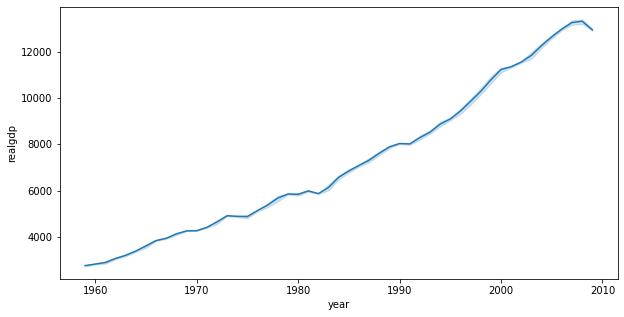

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,y='realgdp',x='year')
plt.show()

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [ ]:
df['cycle'] = gdp_cycle

In [ ]:
df['trend']= gdp_trend

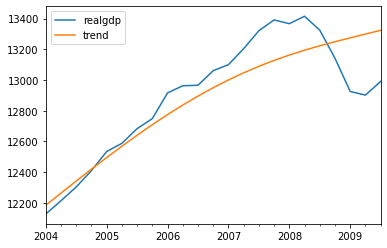

In [ ]:
df[['realgdp','trend']]['2004':].plot()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                 index_col=0,
                parse_dates=True
                 )

In [ ]:
df.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
gdp_cycle, gdp_trend = hpfilter(df,lamb=1600)

In [ ]:
df['cycle'] = gdp_cycle

In [ ]:
df['trend']= gdp_trend

In [ ]:
df

,Thousands of Passengers,cycle,trend
Month,,,
1949-01-01,112,-8.625586,120.625586
1949-02-01,118,-3.651911,121.651911
1949-03-01,132,9.327155,122.672845
1949-04-01,129,5.319286,123.680714
1949-05-01,121,-3.673675,124.673675
...,...,...,...
1960-08-01,606,124.325492,481.674508
1960-09-01,508,23.453495,484.546505
1960-10-01,461,-26.164925,487.164925


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
results = seasonal_decompose(df['Thousands of Passengers'],model='multiplicative')

In [ ]:
df['trend2']  = results.trend


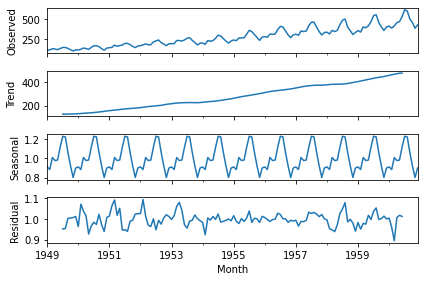

In [ ]:
results.plot();

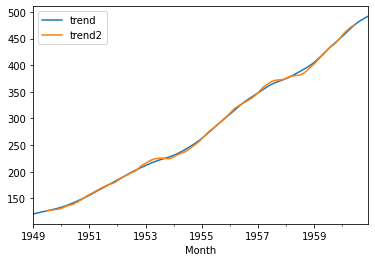

In [ ]:
df['trend trend2'.split()].plot()

#EWMA Exponentially Weighted Moving Average

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.drop('cycle',axis=1,inplace=True)

In [ ]:
df['6-month-SMA']= df['Thousands of Passengers'].rolling(window=6,center=True).mean()

In [ ]:
df['12-month-SMA']= df['Thousands of Passengers'].rolling(window=12,center=True).mean()

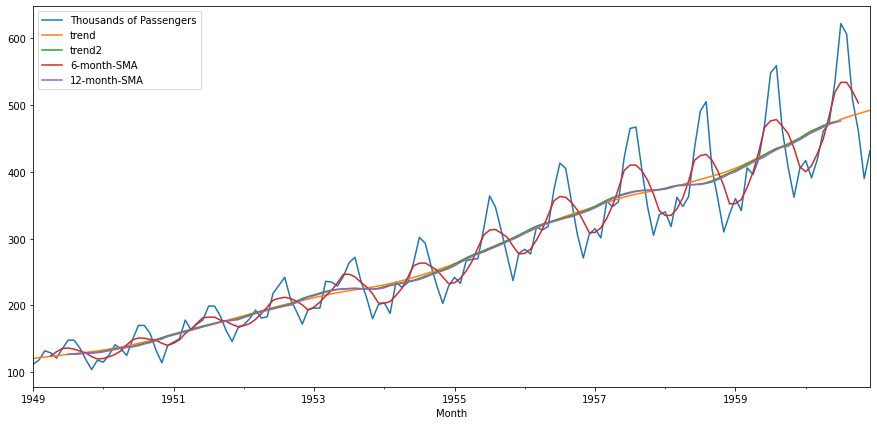

In [ ]:
df.plot(figsize=(15,7))

In [ ]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

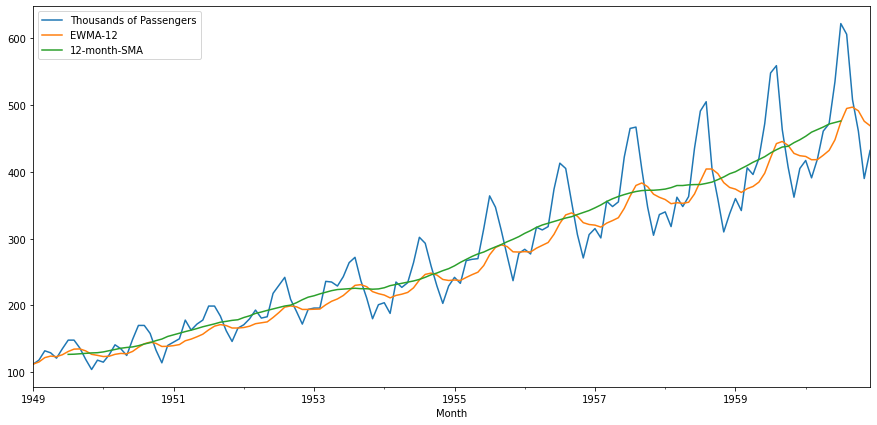

In [ ]:
df[['Thousands of Passengers','EWMA-12','12-month-SMA' ]].plot(figsize=(15,7))

# Holt winters

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                 index_col=0,
                parse_dates=True
                 )

In [ ]:
df = df.dropna()

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [ ]:
df.index.freq='MS'

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span=12
alpha = 2/(span+1)

In [ ]:
#df['EWMA-12-true'] = df['Thousands of Passengers'].ewm(span=12).mean()

In [ ]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

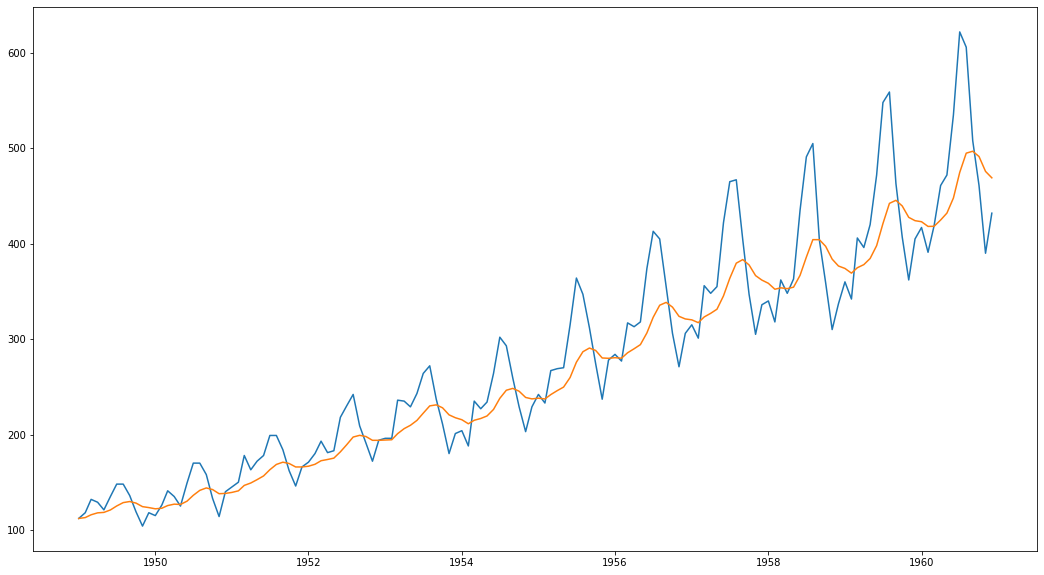

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df)


In [ ]:
model= SimpleExpSmoothing(df['Thousands of Passengers'])

In [ ]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [ ]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [ ]:
df['Holt'] = fitted_model.fittedvalues.shift(-1)

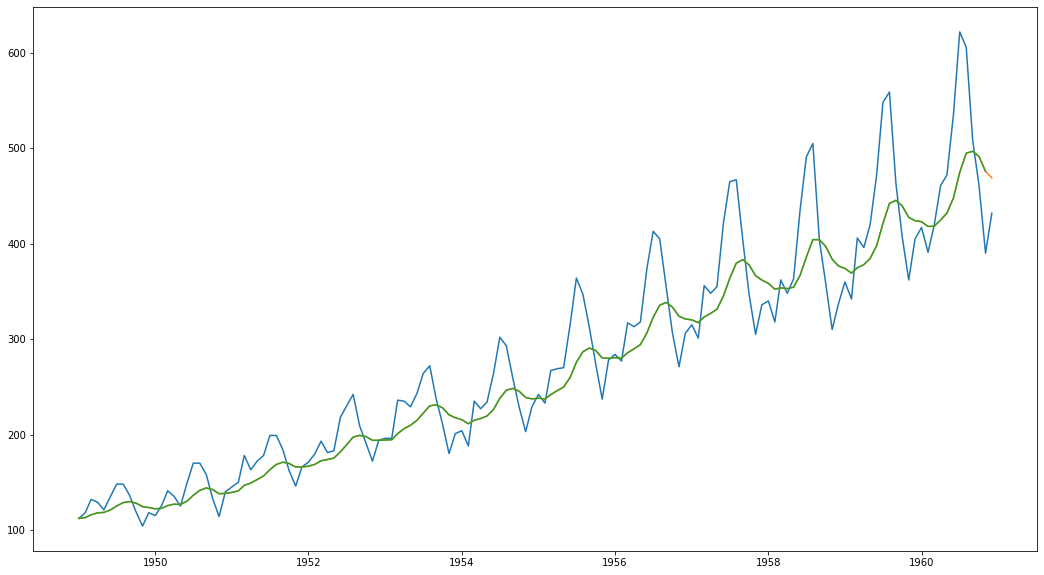

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df)

In [ ]:
df

,Thousands of Passengers,EWMA12,Holt
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model= ExponentialSmoothing(df['Thousands of Passengers'],trend='add')
model= ExponentialSmoothing(df['Thousands of Passengers'],trend='mul')

In [ ]:
fitted_model = model.fit()

In [ ]:
fitted_model.fittedvalues

Month
1949-01-01    111.915888
1949-02-01    112.049247
1949-03-01    118.051885
1949-04-01    132.058041
1949-05-01    129.056722
                 ...    
1960-08-01    622.273496
1960-09-01    606.266460
1960-10-01    508.223369
1960-11-01    461.202703
1960-12-01    390.171484
Freq: MS, Length: 144, dtype: float64

In [ ]:
df['double_add_12'] = fitted_model.fittedvalues.shift(-1)

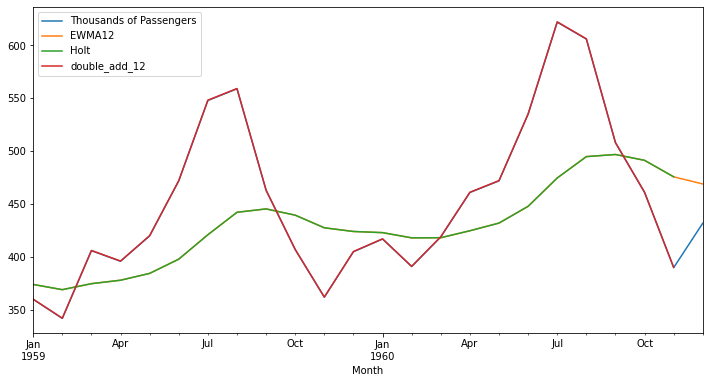

In [ ]:
df.iloc[-24:].plot(figsize=(12,6))

In [ ]:
model= ExponentialSmoothing(df['Thousands of Passengers'],
                            trend='mul',
                            seasonal='mul',
                            seasonal_periods=12)
fitted_model = model.fit()
df['triple_mul_12'] = fitted_model.fittedvalues

In [ ]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'Holt', 'double_add_12',
       'triple_mul_12'],
      dtype='object')

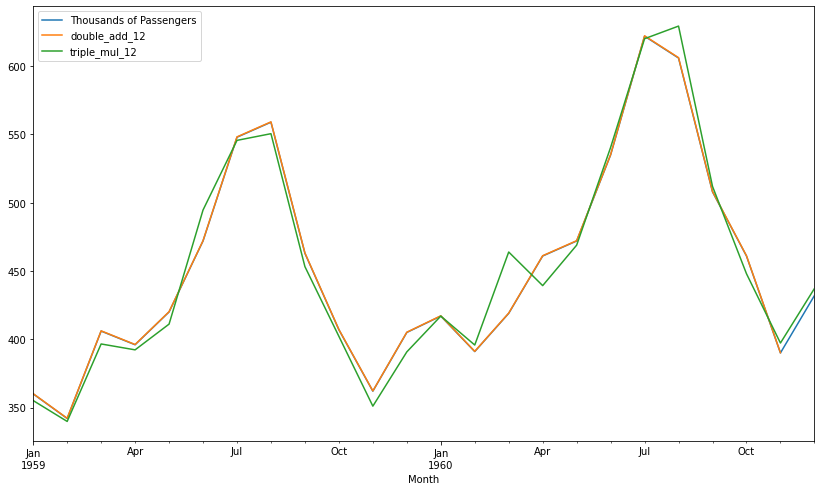

In [ ]:
df.iloc[-24:][['Thousands of Passengers', 
    'double_add_12',
       'triple_mul_12'
       ]].plot(figsize=(14,8))

#Energy

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Time Series/EnergyProduction.csv',
                   index_col=0,
                   parse_dates=True
                   )

In [ ]:
data.index.freq = 'MS'

In [ ]:
data.head(5)

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [ ]:
data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

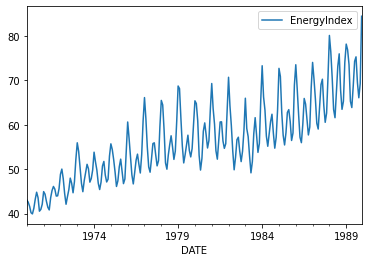

In [ ]:
data.plot()

In [ ]:
data['SMA'] = data['EnergyIndex'].rolling(window=12,center=True).mean()
#.rolling(window=6,center=True).mean()

In [ ]:
data['EWMA'] = data['EnergyIndex'].ewm(span=12).mean()

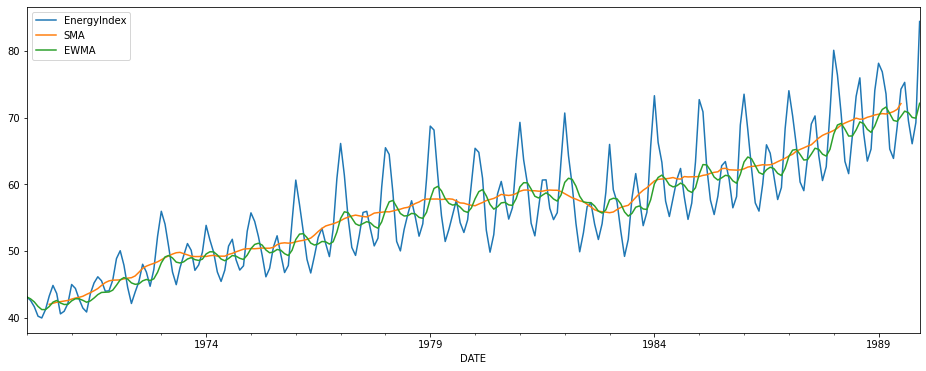

In [ ]:
data.plot(figsize=(16,6))

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(data['EnergyIndex'])

In [ ]:
data['SES-12'] = model.fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)

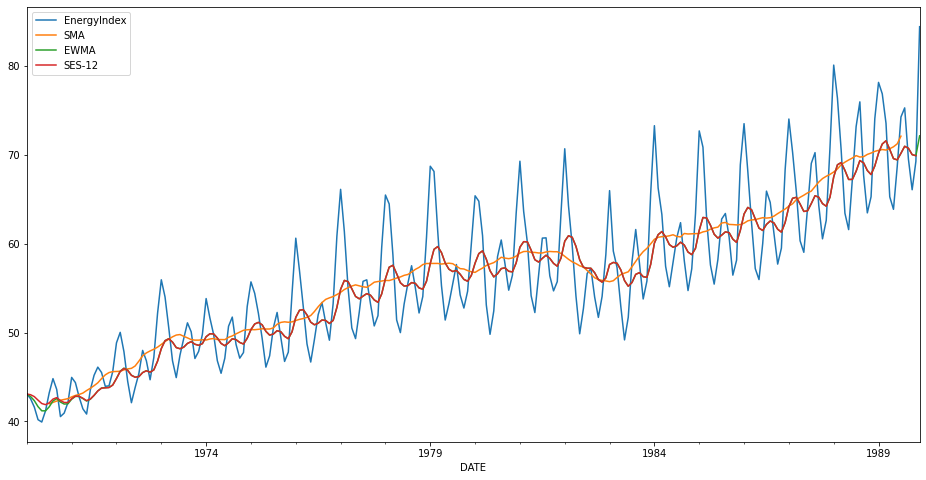

In [ ]:
data.plot(figsize=(16,8))

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data['EnergyIndex'],
                             trend='mul',
                            seasonal='mul',
                            seasonal_periods=12)
fitted_model = model.fit()
data['triple_mul_12'] = fitted_model.fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


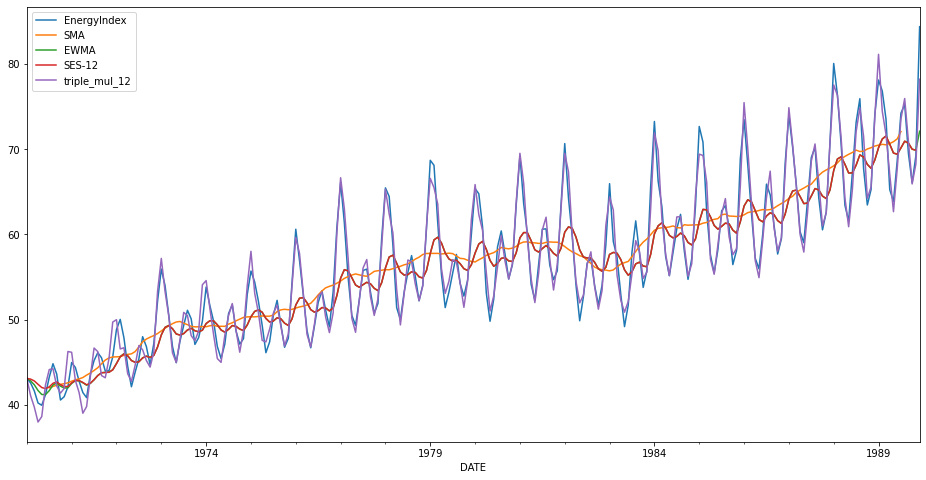

In [ ]:
data.plot(figsize=(16,8))

# Series forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                   index_col="Month",
                   parse_dates=True)
data.index.freq = 'MS'
data.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
len(data)*0.8

115.2

In [ ]:
data.iloc[:-12]

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [ ]:
data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
train = data.iloc[:-36]
test = data.iloc[-36:]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(
                    train,
                    trend='mul',
                    seasonal='mul',
                    seasonal_periods=12
                     ).fit()

In [ ]:
model.fittedvalues

Month
1949-01-01    117.738399
1949-02-01    123.550052
1949-03-01    136.757535
1949-04-01    131.253093
1949-05-01    123.697667
                 ...    
1957-08-01    451.793707
1957-09-01    400.816304
1957-10-01    348.987437
1957-11-01    307.243074
1957-12-01    349.578330
Freq: MS, Length: 108, dtype: float64

In [ ]:
pred = model.forecast(36)

In [ ]:
test

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


In [ ]:
pred

1958-01-01    356.739143
1958-02-01    343.561234
1958-03-01    403.996804
1958-04-01    397.853537
1958-05-01    406.415919
1958-06-01    479.824369
1958-07-01    529.820371
1958-08-01    524.772030
1958-09-01    454.714920
1958-10-01    391.965458
1958-11-01    345.259663
1958-12-01    395.243838
1959-01-01    407.506420
1959-02-01    392.453174
1959-03-01    461.489283
1959-04-01    454.471773
1959-05-01    464.252661
1959-06-01    548.107812
1959-07-01    605.218708
1959-08-01    599.451941
1959-09-01    519.425056
1959-10-01    447.745766
1959-11-01    394.393305
1959-12-01    451.490690
1960-01-01    465.498351
1960-02-01    448.302888
1960-03-01    527.163474
1960-04-01    519.147307
1960-05-01    530.320106
1960-06-01    626.108620
1960-07-01    691.346924
1960-08-01    684.759493
1960-09-01    593.344043
1960-10-01    511.464127
1960-11-01    450.519118
1960-12-01    515.741989
Freq: MS, dtype: float64

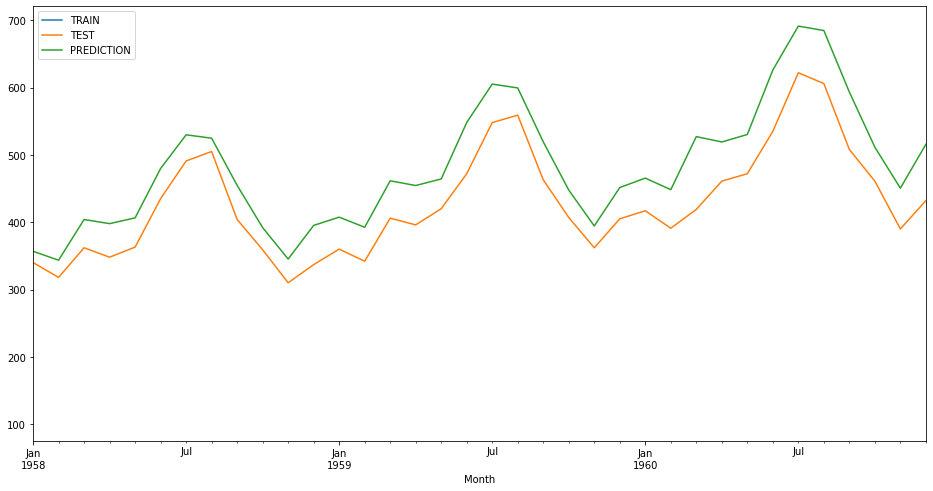

In [ ]:
train['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(16,8))
test['Thousands of Passengers'].plot(legend=True,label='TEST')
pred.plot(legend=True,label='PREDICTION',xlim=['1958-1-1','1960-12-1'])
#plt.plot(model.forecast(36))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(pred,test)
MSE = mean_squared_error(pred,test)

In [ ]:
print(MSE)

3200.583445912333


In [ ]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [ ]:
print(MAE)

53.16361991340851


In [ ]:
print(MSE**0.5)

56.57369924189449


In [ ]:
final_model  = ExponentialSmoothing(
                    data,
                    trend='mul',
                    seasonal='mul',
                    seasonal_periods=12
                     ).fit()

In [ ]:
final_pred = final_model.forecast(36)

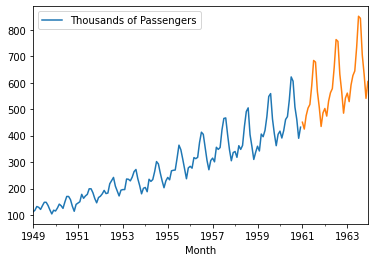

In [ ]:
data.plot()
final_pred.plot()

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Time Series/samples.csv',
                    index_col=0,
                    parse_dates=True)

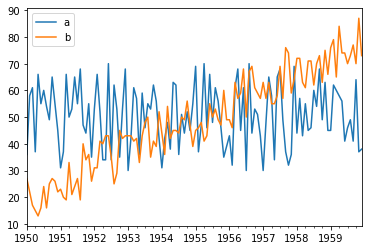

In [ ]:
data2[['a','b']].plot()

In [ ]:
from statsmodels.tsa.statespace.tools import diff

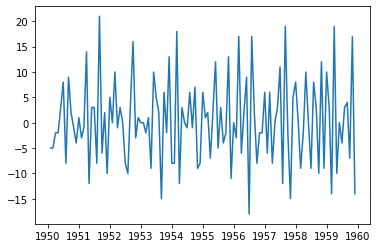

In [ ]:
plt.plot(data2['b'] - data2['b'].shift(1))

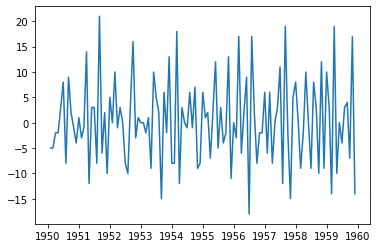

In [ ]:
plt.plot(diff(data2['b'],k_diff=1))

# ACF Auto correlation Function Plot

# PACF  Parctial Auto correlation Function Plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                   index_col="Month",
                   parse_dates=True)
data.index.freq = 'MS'
data.head(1)

,Thousands of Passengers
Month,
1949-01-01,112


In [ ]:
data.tail(1)

,Thousands of Passengers
Month,
1960-12-01,432


In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Time Series/DailyTotalFemaleBirths.csv',
                    index_col="Date",
                    parse_dates=True)
data2.index.freq = 'D'

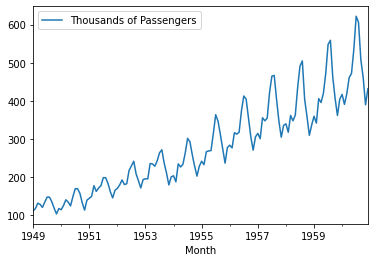

In [ ]:
data.plot()

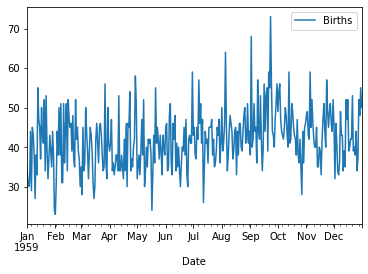

In [ ]:
data2.plot()

In [ ]:
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [ ]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [ ]:
acf(df['a'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [ ]:
pacf_yw(df['a'],nlags=4,method='unbiased')

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [ ]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [ ]:
from pandas.plotting import lag_plot

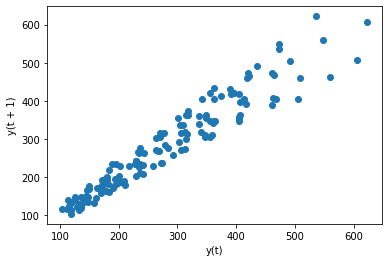

In [ ]:
lag_plot(data['Thousands of Passengers'])

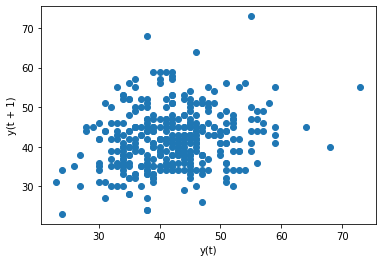

In [ ]:
lag_plot(data2['Births'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

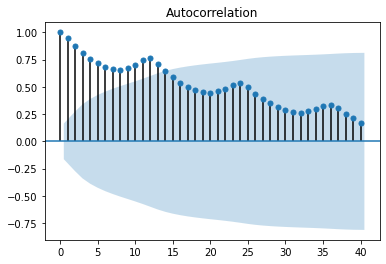

In [ ]:
plot_acf(data['Thousands of Passengers'],lags=40);

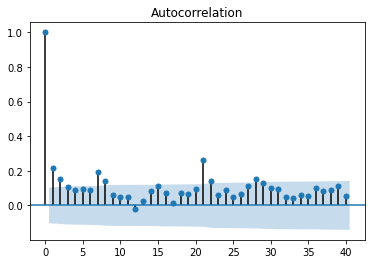

In [ ]:
plot_acf(data2['Births'],lags=40);

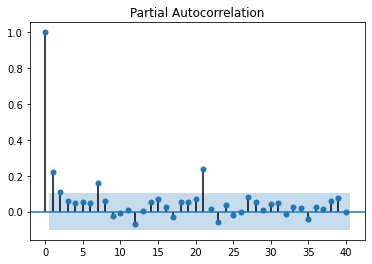

In [ ]:
plot_pacf(data2['Births'],lags=40);

# ARIMA
AR autoregression

I integrated

MA moving average

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Time Series/uspopulation.csv',
                   index_col='DATE',
                   parse_dates=True)

In [ ]:
data.index.freq = 'MS'

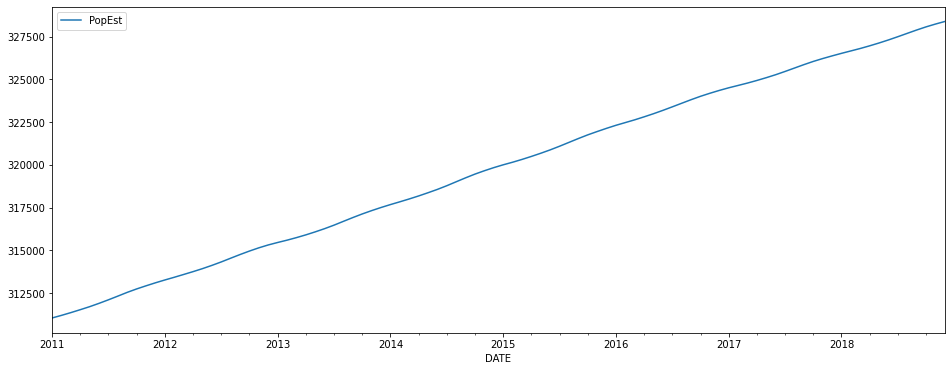

In [ ]:
data.plot(figsize=(16,6))

In [ ]:
len(data)

96

In [ ]:
train = data.iloc[:-12]

In [ ]:
test =  data.iloc[-12:]

In [ ]:
model = AR(train)

In [ ]:
ar1 = model.fit(maxlag=1)

In [ ]:
ar1.fittedvalues

DATE
2011-02-01    311224.221754
2011-03-01    311376.174013
2011-04-01    311538.123131
2011-05-01    311709.069423
2011-06-01    311886.013830
                  ...      
2017-08-01    325650.689194
2017-09-01    325849.626691
2017-10-01    326048.564188
2017-11-01    326236.505140
2017-12-01    326404.452374
Freq: MS, Length: 83, dtype: float64

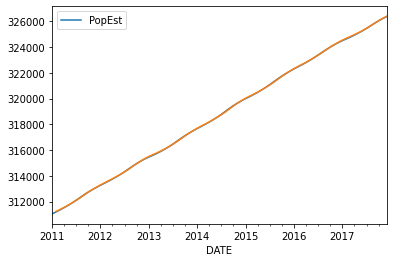

In [ ]:
train.plot()
ar1.fittedvalues.plot()

In [ ]:
start = len(train)
end = len(train)+len(test)-1

In [ ]:
ar1.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

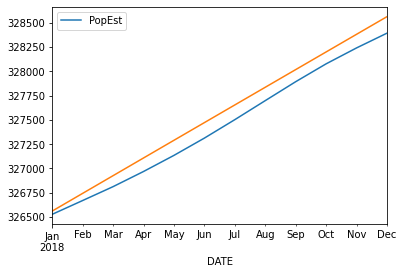

In [ ]:
test.plot()
ar1.predict(start=start,end=end).plot()

In [ ]:
ar2 = model.fit(maxlag=2)
ar2.predict(start=start,end=end)

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944949
2018-05-01    327177.719499
2018-06-01    327340.045897
2018-07-01    327502.787331
2018-08-01    327665.826848
2018-09-01    327829.064481
2018-10-01    327992.414811
2018-11-01    328155.804861
2018-12-01    328319.172309
Freq: MS, dtype: float64

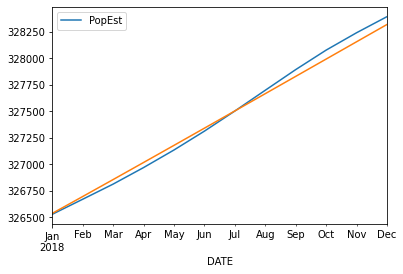

In [ ]:
test.plot()
ar2.predict(start=start,end=end).plot()

In [ ]:
for i in range(1,11):
    model_i= model.fit(maxlag=i)
    print(i,':',round(mean_squared_error(test,model_i.predict(start=start,end=end))))

1 : 17450
2 : 2713
3 : 7658
4 : 7512
5 : 8465
6 : 7523
7 : 6308
8 : 187
9 : 377
10 : 2905


In [ ]:
ARfit = model.fit

In [ ]:
from sklearn.metrics import mean_squared_error

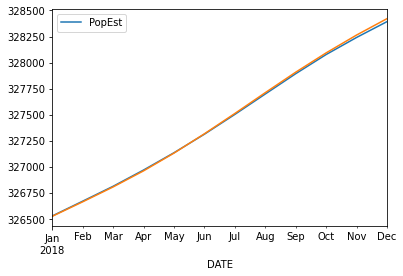

In [ ]:
ar8 = model.fit(maxlag=8)
#ar8.predict(start=start,end=end)
test.plot()
ar8.predict(start=start,end=end).plot()

In [ ]:
model = AR(data)

In [ ]:
ARfit = model.fit()

In [ ]:
forecast = ARfit.predict(start=len(data), end=len(data)+12)

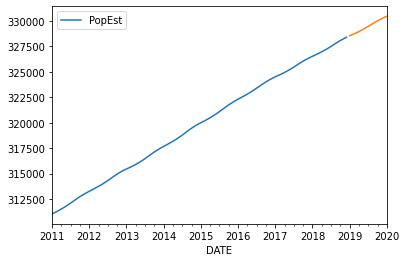

In [ ]:
data.plot()
forecast.plot()

#Descriptive statistics and tests

In [ ]:
#Dickey-fuller test for stationary
#<0.05 is stationary
#>0.05 is not stationary

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                   index_col="Month",
                   parse_dates=True)
data.index.freq = 'MS'
data.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                   index_col="Month",
                   parse_dates=True)
data.index.freq = 'MS'
data.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Time Series/DailyTotalFemaleBirths.csv',
                    index_col="Date",
                    parse_dates=True)
data2.index.freq = 'D'

In [ ]:
data2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dftest = adfuller(data['Thousands of Passengers'])
print(dftest)
dftest = pd.Series(dftest[0:4],index=['ADF','p-value', 'lags','obervations'])
dftest

(0.8153688792060472, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


ADF              0.815369
p-value          0.991880
lags            13.000000
obervations    130.000000
dtype: float64

In [ ]:
dftest = adfuller(data2['Births'])
print(dftest)
dftest = pd.Series(dftest[0:4],index=['ADF','p-value', 'lags','obervations'])
dftest

(-4.808291253559765, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)


ADF             -4.808291
p-value          0.000052
lags             6.000000
obervations    358.000000
dtype: float64

In [ ]:
#Granger causality test
#causality between two sets

In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/Time Series/samples.csv',
                    index_col=0,
                    parse_dates=True)
data3.index.freq = 'MS'

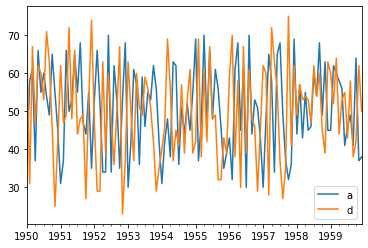

In [ ]:
data3[['a','d']].plot()

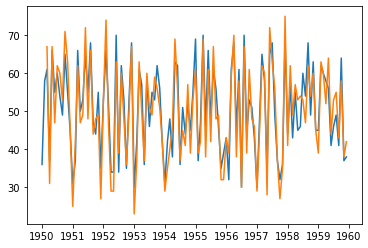

In [ ]:
plt.plot(data3[['a']])
plt.plot(data3[['d']].shift(2))

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

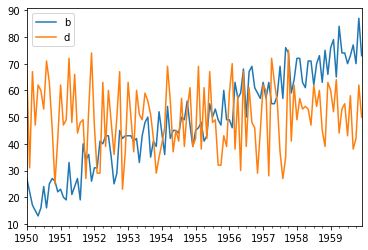

In [ ]:
data3[['b','d']].plot()

In [ ]:
grangercausalitytests(data3[['b','d']],maxlag=8);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7084  , p=0.5879  

In [ ]:
#AIC Akaike Hirotugu Akaike

In [ ]:
np.random.seed(42)
data = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

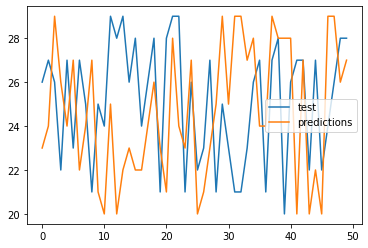

In [ ]:
data.plot()

In [ ]:
from statsmodels.tools.eval_measures import mse, rmse,meanabs

In [ ]:
meanabs(data.iloc[:,0],data.iloc[:,1])

3.54

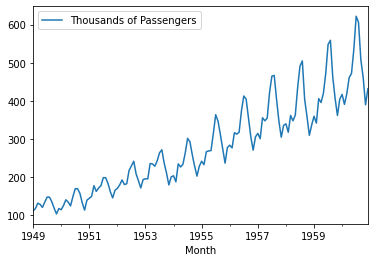

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                   index_col="Month",
                   parse_dates=True)
data2.index.freq = 'MS'
data2.plot()

In [ ]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

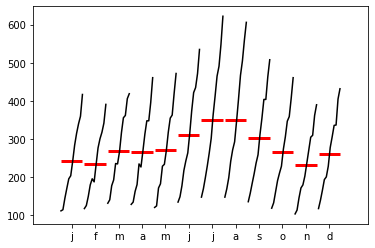

In [ ]:
month_plot(data2);

In [ ]:
data2_quarter = data2.resample(rule='Q').mean()

In [42]:
trade = pd.read_csv('/content/drive/MyDrive/Time Series/TradeInventories.csv',index_col=0,parse_dates=True)

In [43]:
trade.index.freq = 'MS'

In [44]:
train = trade[:-12]
test = trade[-12:]

In [45]:
train

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
...,...
2017-08-01,2097163
2017-09-01,2097753
2017-10-01,2095167


In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [59]:
model = ARIMA(train,order=(1,1,1))
results = model.fit()

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2564.919
Date:                Mon, 27 Jun 2022   AIC                           5135.839
Time:                        12:16:54   BIC                           5146.415
Sample:                    01-01-1997   HQIC                          5140.095
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    726.903      0.000       0.997       1.003
ma.L1         -1.0000      0.035    -28.565      0.000      -1.069      -0.931
sigma2       3.12e+07   3.99e-10   7.81e+16      0.000    3.12e+07    3.12e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.23   Jarque-Bera (JB):               103.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -1.19
Prob(H) (two-sided):                  0.75   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.15e+32. Standard errors may be unstable.
"""

In [61]:
start = len(train)
end = len(train)+len(test-1)

In [62]:
predictions = results.predict(start=start,end=end,type='levels')

AttributeError: ignored

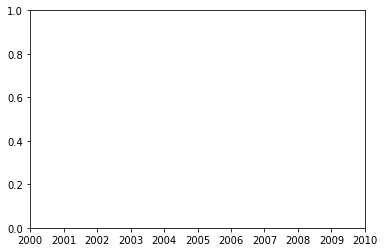

In [70]:
#plt.figure(xlim='2016-01-01')
plt.plot(train, xlim='2016-01-01')
plt.plot(test)
plt.plot(predictions)